ugrizzly spline interpolation code

In [1]:
#Importing needed packages
import matplotlib.pyplot as plt
import ellc
import scipy
from scipy.optimize import curve_fit
from scipy import interpolate
import pylab
import numpy as np
from numpy.polynomial.polynomial import polyfit

In [2]:
#Stellar Conditions/Filter sets for telescopes
T1 = 6500      #Effective temp. in Kelvin
logg1 = 3.4     #log gravity
M_H = 0         #Metallicity of stars

#Filters
filters = [ 'B','C','H','I','J','K','Kp','R','U','V','b','u','v','y','u_','g_','r_','i_','z_' ] #All filters form ellc
SDSSfilters = ['u_','g_','r_','i_','z_', "J", 'H', "K" ]  #Only 2MASS/SDSS filters (8 in total)

#Filter wavelengths - correspond to above filter lists
wavelength = [442, 398, 1630, 879.9, 1220, 2190, 640, 634.9, 364, 540, 435, 354, 410.3, 547, 360, 464, 621.5, 754.5, 870]
SDSSwavelength = [354, 464, 621.5, 754.5, 870, 1220, 1630, 2190]

In [3]:
####FILTER WAVELENGTHS####
#https://en.wikipedia.org/wiki/Photometric_system
#Sloan filters:
 # u_ = 354nm
 # g_ = 464nm
 # r_ = 621.5nm
 # i_ = 754.5nm
 # z_ = 870nm
 # y in range 923.8–1084.5 nm
 # y = 1004nm (FWHM from LSST table) - https://www.lsst.org/about/camera/features
    
#2MASS filters
#http://www.ukidss.org/technical/instrument/filters.html
# J = 1220nm
# H = 1630nm  
# K = 2190nm  

#Johnson filters:
 # U = 364nm
 # B = 442nm
 # V = 540nm
 # R = 634.9nm
 # I = 879.7nm

# C = 1547.5nm

# http://spiff.rit.edu/classes/phys440/lectures/filters/filters.html
# v = 410.3nm
#b = 435nm

#Kp = 2120nm  - assuming this one corresponds to 'Kepler'
#https://books.google.com/books?id=totGBQAAQBAJ&pg=PA421&lpg=PA421&dq=S1+filter+astronomy&source=bl&ots=6o1AGaLhpO&sig=iGDTxIw2nNkUWqOBRAi6H1fpw2s&hl=en&sa=X&ved=0ahUKEwiglqqHxpLcAhWF5IMKHR6kAOsQ6AEIaTAD#v=onepage&q=S1%20filter%20astronomy&f=false


In [4]:
# Setting up dictionary for all filters (including non-Sloan/2MASS)

filtVals = dict()
filtVals['a1'] = np.array([])
filtVals['a2'] = np.array([])
filtVals['a3'] = np.array([])
filtVals['a4'] = np.array([])
for w,f in zip(wavelength, filters):
    ldy_filt = ellc.ldy.LimbGravityDarkeningCoeffs(f)
    a1, a2, a3, a4, y = ldy_filt(T1, logg1, M_H)
    filtVals['a1'] = np.append(filtVals['a1'], a1)
    filtVals['a2'] = np.append(filtVals['a2'], a2)
    filtVals['a3'] = np.append(filtVals['a3'], a3)
    filtVals['a4'] = np.append(filtVals['a4'], a4)
    
# print(filtVals)

In [5]:
# SDSS/2MASS filter dictionary
SDSSfiltVals = dict()
SDSSfiltVals['a1'] = np.array([])
SDSSfiltVals['a2'] = np.array([])
SDSSfiltVals['a3'] = np.array([])
SDSSfiltVals['a4'] = np.array([])
for w,f in zip(SDSSwavelength, SDSSfilters):
    ldy_filt = ellc.ldy.LimbGravityDarkeningCoeffs(f)
    a1, a2, a3, a4, y = ldy_filt(T1, logg1, M_H)
    SDSSfiltVals['a1'] = np.append(SDSSfiltVals['a1'], a1)
    SDSSfiltVals['a2'] = np.append(SDSSfiltVals['a2'], a2)
    SDSSfiltVals['a3'] = np.append(SDSSfiltVals['a3'], a3)
    SDSSfiltVals['a4'] = np.append(SDSSfiltVals['a4'], a4)

# print(SDSSfiltVals)

In [6]:
# Function to interpolate LDC from spline function
def spline_interpolation(wave_length):
    test_wavelengths = SDSSwavelength
    FilterValues = SDSSfiltVals['a1']
    tck = interpolate.splrep(test_wavelengths, FilterValues)
    return interpolate.splev(wave_length, tck)

In [7]:
# SDSS/2MASS filter dictionary
SDSSfiltVals = dict()
SDSSfiltVals['a1'] = np.array([])
SDSSfiltVals['a2'] = np.array([])
SDSSfiltVals['a3'] = np.array([])
SDSSfiltVals['a4'] = np.array([])
for w,f in zip(SDSSwavelength, SDSSfilters):
    ldy_filt = ellc.ldy.LimbGravityDarkeningCoeffs(f)
    a1, a2, a3, a4, y = ldy_filt(T1, logg1, M_H)
    SDSSfiltVals['a1'] = np.append(SDSSfiltVals['a1'], a1)
    SDSSfiltVals['a2'] = np.append(SDSSfiltVals['a2'], a2)
    SDSSfiltVals['a3'] = np.append(SDSSfiltVals['a3'], a3)
    SDSSfiltVals['a4'] = np.append(SDSSfiltVals['a4'], a4)

print(SDSSfiltVals)

{'a1': array([0.25788001, 0.27506   , 0.38828   , 0.46338001, 0.497     ,
       0.47784959, 0.78552388, 0.53728453]), 'a2': array([ 1.08320005,  1.05319998,  0.84673997,  0.52590001,  0.32882   ,
        0.44988985, -0.36283959,  0.04296735]), 'a3': array([-0.61812001, -0.81092   , -0.81945999, -0.53916001, -0.35948001,
       -0.75145406, -0.05212537, -0.39965604]), 'a4': array([0.11756   , 0.28228   , 0.28718001, 0.17467999, 0.1042    ,
       0.32011598, 0.09605704, 0.20868647])}


In [8]:
filtVals = dict()
filtVals['a1'] = np.array([])
filtVals['a2'] = np.array([])
filtVals['a3'] = np.array([])
SDSSfiltVals['a4'] = np.array([])

/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


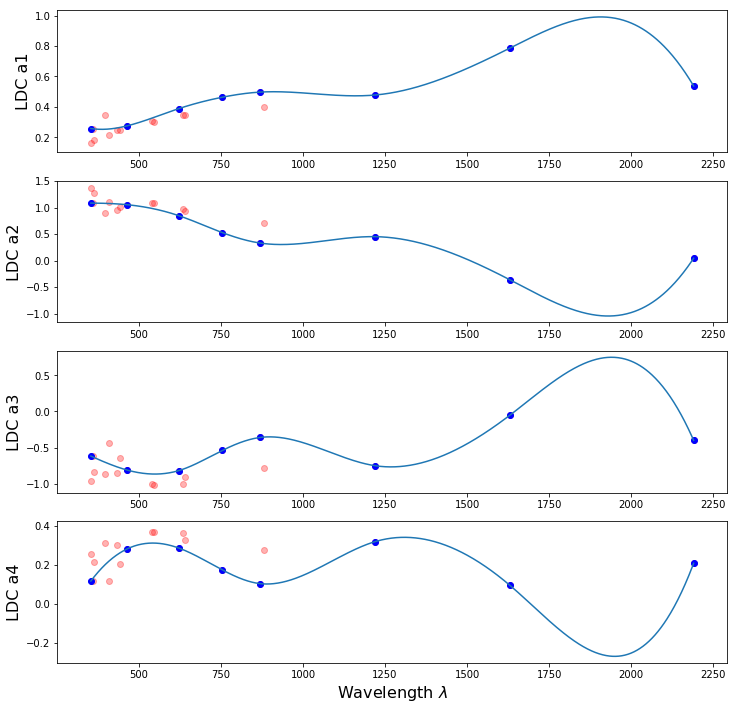

In [9]:
# 4-panel plot - For paper rough draft

filtVals = dict()
filtVals['a1'] = np.array([])
filtVals['a2'] = np.array([])
filtVals['a3'] = np.array([])
filtVals['a4'] = np.array([])
for w,f in zip(wavelength, filters):
    ldy_filt = ellc.ldy.LimbGravityDarkeningCoeffs(f)
    a1, a2, a3, a4, y = ldy_filt(T1, logg1, M_H)
    filtVals['a1'] = np.append(filtVals['a1'], a1)
    filtVals['a2'] = np.append(filtVals['a2'], a2)
    filtVals['a3'] = np.append(filtVals['a3'], a3)
    filtVals['a4'] = np.append(filtVals['a4'], a4)
SDSSfiltVals = dict()
SDSSfiltVals['a1'] = np.array([])
SDSSfiltVals['a2'] = np.array([])
SDSSfiltVals['a3'] = np.array([])
SDSSfiltVals['a4'] = np.array([])
for w,f in zip(SDSSwavelength, SDSSfilters):
    ldy_filt = ellc.ldy.LimbGravityDarkeningCoeffs(f)
    a1, a2, a3, a4, y = ldy_filt(T1, logg1, M_H)
    SDSSfiltVals['a1'] = np.append(SDSSfiltVals['a1'], a1)
    SDSSfiltVals['a2'] = np.append(SDSSfiltVals['a2'], a2)
    SDSSfiltVals['a3'] = np.append(SDSSfiltVals['a3'], a3)
    SDSSfiltVals['a4'] = np.append(SDSSfiltVals['a4'], a4)

# print(SDSSfiltVals)
# print(filtVals)


# Plotting Scatters
f,(ax1,ax2,ax3,ax4) = plt.subplots(4, figsize = (12,12))
ax1.scatter(wavelength, filtVals['a1'], c = 'red', alpha = 0.3)
ax1.scatter(SDSSwavelength, SDSSfiltVals['a1'], c = 'blue')
ax2.scatter(wavelength, filtVals['a2'], c = 'red', alpha = 0.3)  #Use this combo
ax2.scatter(SDSSwavelength, SDSSfiltVals['a2'], c = 'blue')
ax3.scatter(wavelength, filtVals['a3'], c = 'red', alpha = 0.3)
ax3.scatter(SDSSwavelength, SDSSfiltVals['a3'], c = 'blue')
ax4.scatter(wavelength, filtVals['a4'], c = 'red', alpha = 0.3)
ax4.scatter(SDSSwavelength, SDSSfiltVals['a4'], c = 'blue')
ax1.set_ylabel('LDC a1', fontsize = 16)
ax2.set_ylabel('LDC a2', fontsize = 16)
ax3.set_ylabel('LDC a3', fontsize = 16)
ax4.set_ylabel('LDC a4', fontsize = 16)
ax4.set_xlabel('Wavelength $\lambda$', fontsize = 16)

# Now we plot the splines
xnew = np.linspace(354,2190,1000)
a1spline = scipy.interpolate.spline(SDSSwavelength, SDSSfiltVals['a1'], xnew, order = 3)
a2spline = scipy.interpolate.spline(SDSSwavelength, SDSSfiltVals['a2'], xnew, order = 3)
a3spline = scipy.interpolate.spline(SDSSwavelength, SDSSfiltVals['a3'], xnew, order = 3)
a4spline = scipy.interpolate.spline(SDSSwavelength, SDSSfiltVals['a4'], xnew, order = 3)
ax1.plot(xnew, a1spline)
# ax1.legend((SDSSfiltVals['a1'],ax1), ('SDSS Filter', 'All Filters'))
ax2.plot(xnew, a2spline)
ax3.plot(xnew, a3spline)
ax4.plot(xnew, a4spline)

# Saving Figure for use in rough draft
# f.savefig('Paper_LDC_Figure.png')

/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


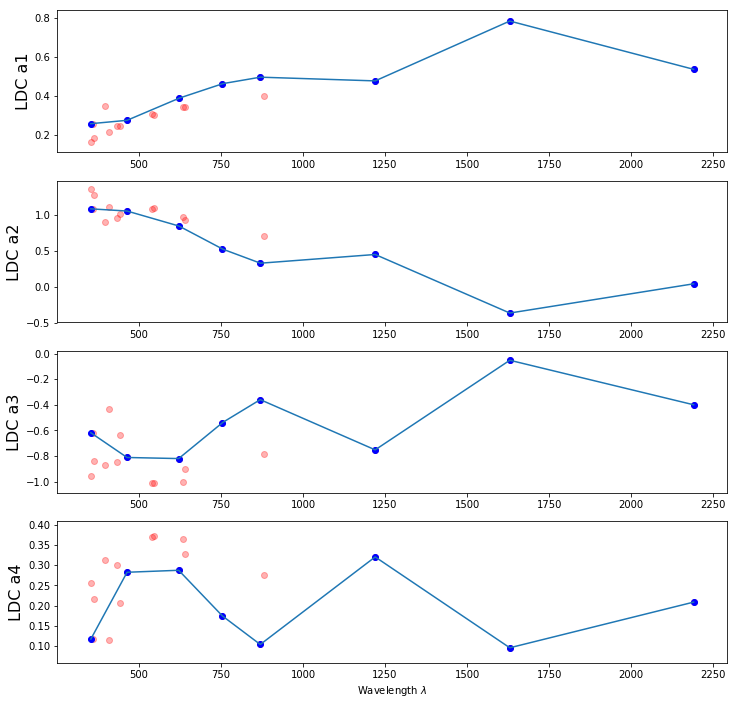

In [10]:
# Linear Interpolation for y band - A1
#     Interpolating between z and J band

# Plotting stuff from above cell
f,(ax1,ax2,ax3,ax4) = plt.subplots(4, figsize = (12,12))
ax1.scatter(wavelength, filtVals['a1'], c = 'red', alpha = 0.3)
ax1.scatter(SDSSwavelength, SDSSfiltVals['a1'], c = 'blue')
ax2.scatter(wavelength, filtVals['a2'], c = 'red', alpha = 0.3)  #Use this combo
ax2.scatter(SDSSwavelength, SDSSfiltVals['a2'], c = 'blue')
ax3.scatter(wavelength, filtVals['a3'], c = 'red', alpha = 0.3)
ax3.scatter(SDSSwavelength, SDSSfiltVals['a3'], c = 'blue')
ax4.scatter(wavelength, filtVals['a4'], c = 'red', alpha = 0.3)
ax4.scatter(SDSSwavelength, SDSSfiltVals['a4'], c = 'blue')
ax4.set_xlabel('Wavelength $\lambda$')
ax1.set_ylabel('LDC a1', fontsize = 16)
ax2.set_ylabel('LDC a2', fontsize = 16)
ax3.set_ylabel('LDC a3', fontsize = 16)
ax4.set_ylabel('LDC a4', fontsize = 16)

# Now let's do that hockey
#     First order spline??????
fun_x = np.linspace(354,2190,1000)
a1spline = scipy.interpolate.spline(SDSSwavelength, SDSSfiltVals['a1'], fun_x, order = 1)
a2spline = scipy.interpolate.spline(SDSSwavelength, SDSSfiltVals['a2'], fun_x, order = 1)
a3spline = scipy.interpolate.spline(SDSSwavelength, SDSSfiltVals['a3'], fun_x, order = 1)
a4spline = scipy.interpolate.spline(SDSSwavelength, SDSSfiltVals['a4'], fun_x, order = 1)

# Plotting the splines
ax1.plot(fun_x, a1spline)
ax2.plot(fun_x, a2spline)
ax3.plot(fun_x, a3spline)
ax4.plot(fun_x, a4spline)

# Now we need to pick the specific y-wavelength to interpolate at
# y_band = fun_x[]
# print(y_band)

In [11]:
def a1_spline_interpolation(wave_length):
    test_wavelengths = SDSSwavelength
    FilterValues = SDSSfiltVals['a1']
    tck = interpolate.splrep(test_wavelengths, FilterValues)
    return interpolate.splev(wave_length, tck)

def a2_spline_interpolation(wave_length):
    test_wavelengths = SDSSwavelength
    FilterValues = SDSSfiltVals['a2']
    tck = interpolate.splrep(test_wavelengths, FilterValues)
    return interpolate.splev(wave_length, tck)

def a3_spline_interpolation(wave_length):
    test_wavelengths = SDSSwavelength
    FilterValues = SDSSfiltVals['a3']
    tck = interpolate.splrep(test_wavelengths, FilterValues)
    return interpolate.splev(wave_length, tck)

def a4_spline_interpolation(wave_length):
    test_wavelengths = SDSSwavelength
    FilterValues = SDSSfiltVals['a4']
    tck = interpolate.splrep(test_wavelengths, FilterValues)
    return interpolate.splev(wave_length, tck)



/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


The y-band a1 coefficient from spline interpolation is: 0.48856142168859656
The y-band a2 coefficient from spline interpolation is: 0.3321416105880066
The y-band a3 coefficient from spline interpolation is: -0.4454751748961016
The y-band a4 coefficient from spline interpolation is: 0.1539255499826475


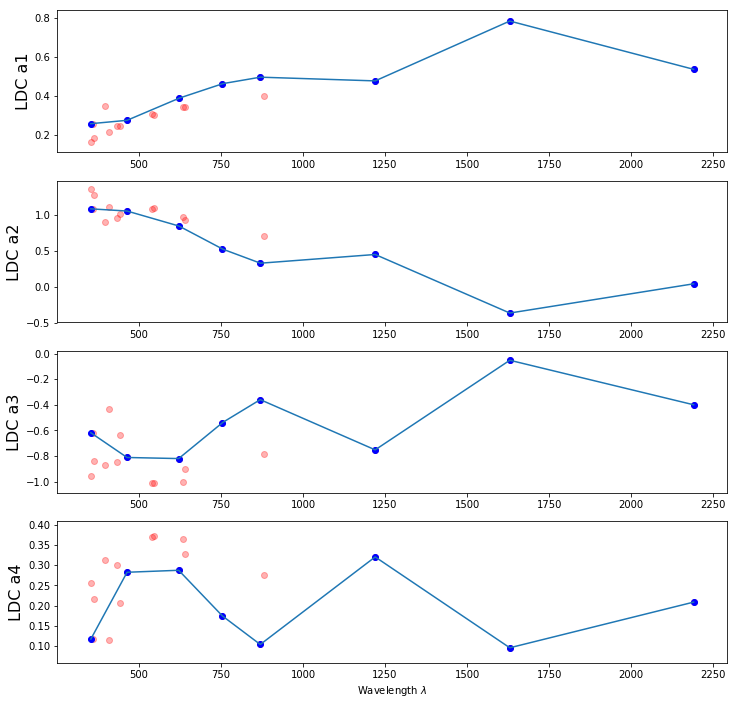

In [12]:
a1_interpolate = np.interp(SDSSwavelength,SDSSwavelength, SDSSfiltVals['a1'])
f,(ax1,ax2,ax3,ax4) = plt.subplots(4, figsize = (12,12))
ax1.scatter(wavelength, filtVals['a1'], c = 'red', alpha = 0.3)
ax1.scatter(SDSSwavelength, SDSSfiltVals['a1'], c = 'blue')
ax2.scatter(wavelength, filtVals['a2'], c = 'red', alpha = 0.3)  #Use this combo
ax2.scatter(SDSSwavelength, SDSSfiltVals['a2'], c = 'blue')
ax3.scatter(wavelength, filtVals['a3'], c = 'red', alpha = 0.3)
ax3.scatter(SDSSwavelength, SDSSfiltVals['a3'], c = 'blue')
ax4.scatter(wavelength, filtVals['a4'], c = 'red', alpha = 0.3)
ax4.scatter(SDSSwavelength, SDSSfiltVals['a4'], c = 'blue')
ax4.set_xlabel('Wavelength $\lambda$')
ax1.set_ylabel('LDC a1', fontsize = 16)
ax2.set_ylabel('LDC a2', fontsize = 16)
ax3.set_ylabel('LDC a3', fontsize = 16)
ax4.set_ylabel('LDC a4', fontsize = 16)

a1spline = scipy.interpolate.spline(SDSSwavelength, SDSSfiltVals['a1'], fun_x, order = 1)
a2spline = scipy.interpolate.spline(SDSSwavelength, SDSSfiltVals['a2'], fun_x, order = 1)
a3spline = scipy.interpolate.spline(SDSSwavelength, SDSSfiltVals['a3'], fun_x, order = 1)
a4spline = scipy.interpolate.spline(SDSSwavelength, SDSSfiltVals['a4'], fun_x, order = 1)

# Plotting the splines
ax1.plot(fun_x, a1spline)
ax2.plot(fun_x, a2spline)
ax3.plot(fun_x, a3spline)
ax4.plot(fun_x, a4spline)

print('The y-band a1 coefficient from spline interpolation is:', a1_spline_interpolation(1004))
print('The y-band a2 coefficient from spline interpolation is:', a2_spline_interpolation(1004))
print('The y-band a3 coefficient from spline interpolation is:', a3_spline_interpolation(1004))
print('The y-band a4 coefficient from spline interpolation is:', a4_spline_interpolation(1004))


In [13]:
y_wavelength = [1004]
find_y_a1 = np.interp(y_wavelength, SDSSwavelength, SDSSfiltVals['a1'])
find_y_a2 = np.interp(y_wavelength, SDSSwavelength, SDSSfiltVals['a2'])
find_y_a3 = np.interp(y_wavelength, SDSSwavelength, SDSSfiltVals['a3'])
find_y_a4 = np.interp(y_wavelength, SDSSwavelength, SDSSfiltVals['a4'])

# print(find_y_a1, find_y_a2, find_y_a3, find_y_a4)

print('The y-band a1 coefficient from spline interpolation is:', find_y_a1)
print('The y-band a2 coefficient from spline interpolation is:', find_y_a2)
print('The y-band a3 coefficient from spline interpolation is:', find_y_a3)
print('The y-band a4 coefficient from spline interpolation is:', find_y_a4)

The y-band a1 coefficient from spline interpolation is: [0.48966813]
The y-band a2 coefficient from spline interpolation is: [0.37517245]
The y-band a3 coefficient from spline interpolation is: [-0.50955008]
The y-band a4 coefficient from spline interpolation is: [0.18686498]


The y-band a1 coefficient is: [0.48966813]
The y-band a2 coefficient is: [0.37517245]
The y-band a3 coefficient is: [-0.50955008]
The y-band a4 coefficient is: [0.18686498]


/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


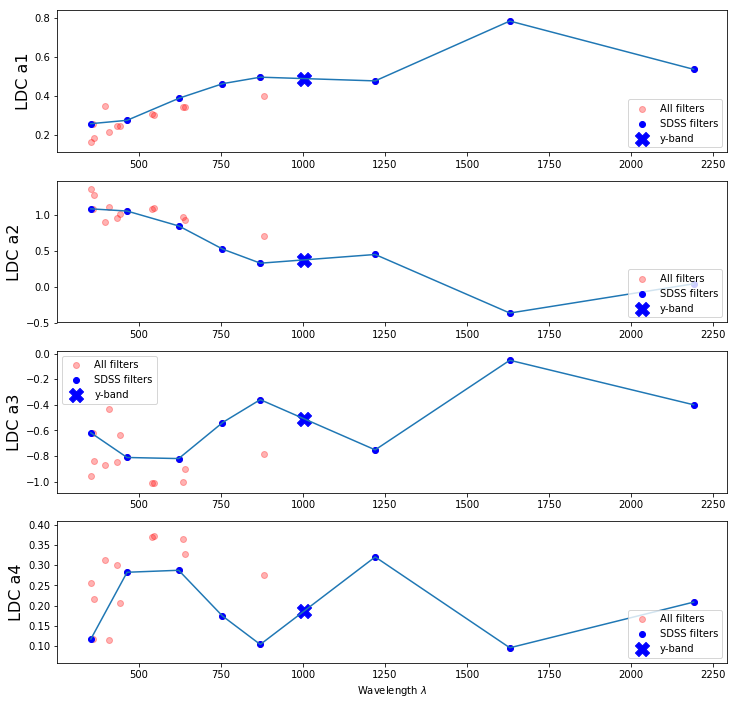

In [14]:
# Plots Interpolation for y-band (given Temp and Gravity)

def MakeInterPlots():
    fun_x = np.linspace(354,2190,1000)

    # Creates plots of all LDC values
    f,(ax1,ax2,ax3,ax4) = plt.subplots(4, figsize = (12,12))
    a1_all = ax1.scatter(wavelength, filtVals['a1'], c = 'red', alpha = 0.3)
    a1_SDSS = ax1.scatter(SDSSwavelength, SDSSfiltVals['a1'], c = 'blue')
    a2_all = ax2.scatter(wavelength, filtVals['a2'], c = 'red', alpha = 0.3)  #Use this combo
    a2_SDSS = ax2.scatter(SDSSwavelength, SDSSfiltVals['a2'], c = 'blue')
    a3_all = ax3.scatter(wavelength, filtVals['a3'], c = 'red', alpha = 0.3)
    a3_SDSS = ax3.scatter(SDSSwavelength, SDSSfiltVals['a3'], c = 'blue')
    a4_all =ax4.scatter(wavelength, filtVals['a4'], c = 'red', alpha = 0.3)
    a4_SDSS = ax4.scatter(SDSSwavelength, SDSSfiltVals['a4'], c = 'blue')
    ax4.set_xlabel('Wavelength $\lambda$')
    ax1.set_ylabel('LDC a1', fontsize = 16)
    ax2.set_ylabel('LDC a2', fontsize = 16)
    ax3.set_ylabel('LDC a3', fontsize = 16)
    ax4.set_ylabel('LDC a4', fontsize = 16)

#     Creating splines (Interpolation lines between points)
    a1spline = scipy.interpolate.spline(SDSSwavelength, SDSSfiltVals['a1'], fun_x, order = 1)
    a2spline = scipy.interpolate.spline(SDSSwavelength, SDSSfiltVals['a2'], fun_x, order = 1)
    a3spline = scipy.interpolate.spline(SDSSwavelength, SDSSfiltVals['a3'], fun_x, order = 1)
    a4spline = scipy.interpolate.spline(SDSSwavelength, SDSSfiltVals['a4'], fun_x, order = 1)

    # Plotting the splines - Not what we're suing to actually interpolate
    ax1.plot(fun_x, a1spline)
    ax2.plot(fun_x, a2spline)
    ax3.plot(fun_x, a3spline)
    ax4.plot(fun_x, a4spline)

    # Plotting y-band values (Big blue X)
    a1y = ax1.scatter(1004, find_y_a1, c = "blue", s = 200, marker = "X", alpha = 1)
    a2y = ax2.scatter(1004, find_y_a2, c = "blue", s = 200, marker = "X", alpha = 1)
    a3y = ax3.scatter(1004, find_y_a3, c = "blue", s = 200, marker = "X", alpha = 1)
    a4y = ax4.scatter(1004, find_y_a4, c = "blue", s = 200, marker = "X", alpha = 1)

    # Creating a legend for each plot
    ax1.legend((a1_all, a1_SDSS, a1y), ('All filters', 'SDSS filters', 'y-band'), loc = 'lower right')
    ax2.legend((a2_all, a2_SDSS, a2y), ('All filters', 'SDSS filters', 'y-band'), loc = 'lower right')
    ax3.legend((a3_all, a3_SDSS, a3y), ('All filters', 'SDSS filters', 'y-band'))
    ax4.legend((a4_all, a4_SDSS, a4y), ('All filters', 'SDSS filters', 'y-band'), loc = 'lower right')

    # Prints out set of LDCs
    print('The y-band a1 coefficient is:', str(find_y_a1))
    print('The y-band a2 coefficient is:', str(find_y_a2))
    print('The y-band a3 coefficient is:', str(find_y_a3))
    print('The y-band a4 coefficient is:', str(find_y_a4))
    
MakeInterPlots()

In [15]:
# Function to find LDCs for all Teff-logg within some arbitrary range (Used the ColorMap range right now)
#     All filters used for this - multiband -> Retrieves all y values
def all_y_values(Teff = np.arange(3500,10000,250), logg = np.arange(2,5,float(0.1)), Z = 0):

    CoeffList = []
#     All filters lists
    filters = [ 'B','C','H','I','J','K','Kp','R','U','V','b','u','v','y','u_','g_','r_','i_','z_' ] #All filters form ellc
    SDSSfilters = ['u_','g_','r_','i_','z_', "J", 'H', "K" ]  #Only 2MASS/SDSS filters (8 in total)
    
#     All wavelength lists
    y_wavelength = [1004]
    wavelength = [442, 398, 1630, 879.9, 1220, 2190, 640, 634.9, 364, 540, 435, 354, 410.3, 547, 360, 464, 621.5, 754.5, 870]
    SDSSwavelength = [354, 464, 621.5, 754.5, 870, 1220, 1630, 2190]

    pairs = []
    AllPairs = []
#     For loop to get LDCs for each Teff-logg pairing
    for T in Teff:
        for g in logg:

            pairs.append([T,g])

            SDSSfiltVals = dict()
            SDSSfiltVals['a1'] = np.array([])
            SDSSfiltVals['a2'] = np.array([])
            SDSSfiltVals['a3'] = np.array([])
            SDSSfiltVals['a4'] = np.array([])
            for w,f in zip(SDSSwavelength, SDSSfilters):
                ldy_filt = ellc.ldy.LimbGravityDarkeningCoeffs(f)
                a1, a2, a3, a4, y = ldy_filt(T, g, Z)
                SDSSfiltVals['a1'] = np.append(SDSSfiltVals['a1'], a1)
                SDSSfiltVals['a2'] = np.append(SDSSfiltVals['a2'], a2)
                SDSSfiltVals['a3'] = np.append(SDSSfiltVals['a3'], a3)
                SDSSfiltVals['a4'] = np.append(SDSSfiltVals['a4'], a4)
            
#             Sets up interppolation for y-band for each coeff
            find_y_a1 = np.interp(y_wavelength, SDSSwavelength, SDSSfiltVals['a1'])
            find_y_a2 = np.interp(y_wavelength, SDSSwavelength, SDSSfiltVals['a2'])
            find_y_a3 = np.interp(y_wavelength, SDSSwavelength, SDSSfiltVals['a3'])
            find_y_a4 = np.interp(y_wavelength, SDSSwavelength, SDSSfiltVals['a4'])
            
            every_y = [float(find_y_a1), float(find_y_a2), float(find_y_a3), float(find_y_a4)] #Turns all interpolations into floats within the list

            CoeffList.append(every_y)  #Need way to access this list via Temp, gravity

#             print(CoeffList)

    AllPairs.append(pairs[:-1:])
    AllPairs = AllPairs[0]

    return AllPairs, CoeffList

all_y_values()

([[3500, 2.0],
  [3500, 2.1],
  [3500, 2.2],
  [3500, 2.3000000000000003],
  [3500, 2.4000000000000004],
  [3500, 2.5000000000000004],
  [3500, 2.6000000000000005],
  [3500, 2.7000000000000006],
  [3500, 2.8000000000000007],
  [3500, 2.900000000000001],
  [3500, 3.000000000000001],
  [3500, 3.100000000000001],
  [3500, 3.200000000000001],
  [3500, 3.300000000000001],
  [3500, 3.4000000000000012],
  [3500, 3.5000000000000013],
  [3500, 3.6000000000000014],
  [3500, 3.7000000000000015],
  [3500, 3.8000000000000016],
  [3500, 3.9000000000000017],
  [3500, 4.000000000000002],
  [3500, 4.100000000000001],
  [3500, 4.200000000000002],
  [3500, 4.3000000000000025],
  [3500, 4.400000000000002],
  [3500, 4.500000000000002],
  [3500, 4.600000000000002],
  [3500, 4.700000000000003],
  [3500, 4.8000000000000025],
  [3500, 4.900000000000002],
  [3750, 2.0],
  [3750, 2.1],
  [3750, 2.2],
  [3750, 2.3000000000000003],
  [3750, 2.4000000000000004],
  [3750, 2.5000000000000004],
  [3750, 2.600000000000

In [16]:
# Function that takes in any effective temperature and log(g) and outputs interpolated y-values for that pairing
def Get_Temp_G_LDC(Temp,Grav):
   
    All_Pairs, CoeffList = all_y_values()
    New_All_Pairs = []
    
    for x in All_Pairs:
        x[1] = round(x[1],1)
        New_All_Pairs.append(x)

    
    for i in range(0,len(All_Pairs)):

        if All_Pairs[i][0] == Temp and New_All_Pairs[i][1] == Grav:
            correct_pair=All_Pairs[i]
            correct_index = i
#     Right_LDCs = CoeffList[correct_index]
    Right_LDCs = CoeffList[i]

            
    return Right_LDCs #, correct_pair




In [17]:
Get_Temp_G_LDC(4000, 4.5)

[0.6459106570739171,
 -0.562664665546708,
 0.5183545830756998,
 -0.18708748196055933]

In [18]:
Get_Temp_G_LDC(9000,2.3)

KeyboardInterrupt: 

In [ ]:
Get_Temp_G_LDC(6500,3.8)

In [ ]:
Get_Temp_G_LDC(7250,2.2)

[[ 0.99333998  0.44548     0.60477998  0.66456     0.70247998  0.5818947
   0.57541144  0.50901287]
 [-0.99478002  0.57912001 -0.04186    -0.39960001 -0.58036002 -0.40123792
  -0.57934191 -0.52349787]
 [ 1.11945996 -0.31078     0.17478     0.46763999  0.55439999  0.32678724
   0.50821488  0.45170798]
 [-0.39931999  0.03528    -0.10492    -0.19154    -0.20818    -0.11077965
  -0.17733157 -0.15214064]]
[0.99333998 0.44548    0.60477998 0.66456    0.70247998 0.5818947
 0.57541144 0.50901287]
 
[ 354.   464.   621.5  754.5  870.  1220.  1630.  2190. ]


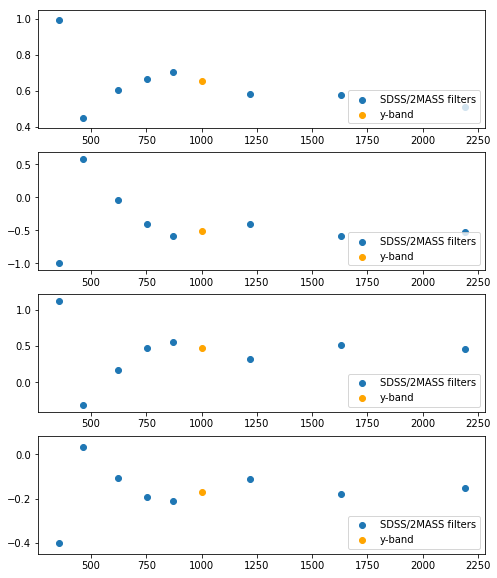

In [19]:
# Get_Temp_G function works now. word.
# Making an array to be faster
Teff = 9000
G = 4.6
Z = 0
SDSS_wavelengths = np.array([354, 464, 621.5, 754.5, 870, 1220, 1630, 2190])
# SDSSfilters = ['u_','g_','r_','i_','z_', "J", 'H', "K" ]
a1_array = np.array([])
a2_array = np.array([])
a3_array = np.array([])
a4_array = np.array([])
for w,f in zip(SDSSwavelength, SDSSfilters):
    ldy_filt = ellc.ldy.LimbGravityDarkeningCoeffs(f)
    a1, a2, a3, a4, y = ldy_filt(Teff, G, Z)
    a1_array = np.append(a1_array, a1)
    a2_array = np.append(a2_array, a2)
    a3_array = np.append(a3_array, a3)
    a4_array = np.append(a4_array, a4)

LDC_array = np.array([a1_array,a2_array,a3_array,a4_array])
print(LDC_array)
print(LDC_array[0])
print(' ')
print(SDSS_wavelengths)

f,(ax1, ax2,ax3,ax4) = plt.subplots(4,1, figsize = (8,10))
im1 = ax1.scatter(SDSS_wavelengths, a1_array)
im2 = ax2.scatter(SDSS_wavelengths, a2_array)
im3 = ax3.scatter(SDSS_wavelengths, a3_array)
im4 = ax4.scatter(SDSS_wavelengths, a4_array)


y_wavelength = [1004]
find_y_a1 = np.interp(y_wavelength, SDSS_wavelengths, a1_array)
find_y_a2 = np.interp(y_wavelength, SDSS_wavelengths, a2_array)
find_y_a3 = np.interp(y_wavelength, SDSS_wavelengths, a3_array)
find_y_a4 = np.interp(y_wavelength, SDSS_wavelengths, a4_array)

Im1 = ax1.scatter(y_wavelength, find_y_a1, color = 'Orange')
Im2 = ax2.scatter(y_wavelength, find_y_a2, color = 'Orange')
Im3 = ax3.scatter(y_wavelength, find_y_a3, color = 'Orange')
Im4 = ax4.scatter(y_wavelength, find_y_a4, color = 'Orange')

ax1.legend((im1, Im1), ('SDSS/2MASS filters', 'y-band'), loc = 'lower right')
ax2.legend((im1, Im2), ('SDSS/2MASS filters', 'y-band'), loc = 'lower right')
ax3.legend((im1, Im3), ('SDSS/2MASS filters', 'y-band'), loc = 'lower right')
ax4.legend((im1, Im4), ('SDSS/2MASS filters', 'y-band'), loc = 'lower right')

The y-band a1 coefficient is: 0.6459106570739171
The y-band a2 coefficient is: -0.562664665546708
The y-band a3 coefficient is: 0.5183545830756998
The y-band a4 coefficient is: -0.18708748196055933


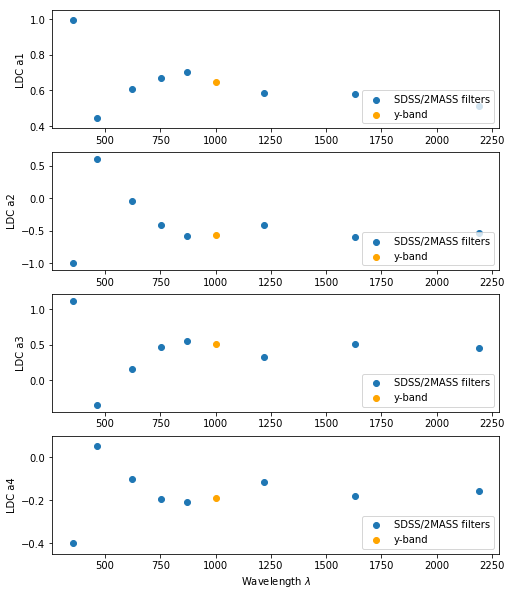

In [31]:
# Making plots from Get_Temp_G returned values

def BadPlots(T,G,Z):
    
    y_wavelength = [1004]
    
    SDSSwavelength = np.array([354, 464, 621.5, 754.5, 870, 1220, 1630, 2190])
    SDSSfilters = np.array(['u_','g_','r_','i_','z_', "J", 'H', "K" ])
    
    a1_array = np.array([])
    a2_array = np.array([])
    a3_array = np.array([])
    a4_array = np.array([])
    for w,f in zip(SDSSwavelength, SDSSfilters):
        ldy_filt = ellc.ldy.LimbGravityDarkeningCoeffs(f)
        a1, a2, a3, a4, y = ldy_filt(T, G, Z)
        a1_array = np.append(a1_array, a1)
        a2_array = np.append(a2_array, a2)
        a3_array = np.append(a3_array, a3)
        a4_array = np.append(a4_array, a4)
        a1, a2, a3, a4 = Get_Temp_G_LDC(T,G)
    f,(ax1, ax2,ax3,ax4) = plt.subplots(4,1, figsize = (8,10))
    im1 = ax1.scatter(SDSS_wavelengths, a1_array)
    im2 = ax2.scatter(SDSS_wavelengths, a2_array)
    im3 = ax3.scatter(SDSS_wavelengths, a3_array)
    im4 = ax4.scatter(SDSS_wavelengths, a4_array)

    Im1 = ax1.scatter(y_wavelength, a1, color = 'Orange')
    Im2 = ax2.scatter(y_wavelength, a2, color = 'Orange')
    Im3 = ax3.scatter(y_wavelength, a3, color = 'Orange')
    Im4 = ax4.scatter(y_wavelength, a4, color = 'Orange')

    ax1.legend((im1, Im1), ('SDSS/2MASS filters', 'y-band'), loc = 'lower right')
    ax2.legend((im1, Im2), ('SDSS/2MASS filters', 'y-band'), loc = 'lower right')
    ax3.legend((im1, Im3), ('SDSS/2MASS filters', 'y-band'), loc = 'lower right')
    ax4.legend((im1, Im4), ('SDSS/2MASS filters', 'y-band'), loc = 'lower right')
    
    ax1.set_ylabel('LDC a1')
    ax2.set_ylabel('LDC a2')
    ax3.set_ylabel('LDC a3')
    ax4.set_ylabel('LDC a4')
    ax4.set_xlabel('Wavelength $\lambda$')
    
    print('The y-band a1 coefficient is:', a1)
    print('The y-band a2 coefficient is:', a2)
    print('The y-band a3 coefficient is:', a3)
    print('The y-band a4 coefficient is:', a4)

    
MakePlots(4000, 4.5)

In [ ]:
MakePlots(8000, 4.1)

In [81]:
# Function to get y-band LDCs for any Teff, logg, M_H
# To be put into Aaron's code (EBLSST.py)

def get_y_LDC(Teff, logg, M_H):
    
#     All filters/wavelength arrays
    SDSSfilters = ['u_','g_','r_','i_','z_', "J", 'H', "K" ]  #Only 2MASS/SDSS filters (8 in total)
    SDSSwavelength = np.array([354, 464, 621.5, 754.5, 870, 1220, 1630, 2190])
    y_wavelength = np.array(1004)
    
#     Getting coefficients from ELLC and appending them to specific coeff arrays
    SDSSfiltVals = np.array([])
    a1_array = np.array([])
    a2_array = np.array([])
    a3_array = np.array([])
    a4_array = np.array([])
#     Gets LDCs for all filters
    for w,f in zip(SDSSwavelength, SDSSfilters):
        ldy_filt = ellc.ldy.LimbGravityDarkeningCoeffs(f)
        a1, a2, a3, a4, y = ldy_filt(Teff, logg, M_H)
        a1_array = np.append(a1_array, a1)
        a2_array = np.append(a2_array, a2)
        a3_array = np.append(a3_array, a3)
        a4_array = np.append(a4_array, a4)

#     Sets up interpolation for y-band for each coeff
    find_y_a1 = np.interp(y_wavelength, SDSSwavelength, a1_array)
    find_y_a2 = np.interp(y_wavelength, SDSSwavelength, a2_array)
    find_y_a3 = np.interp(y_wavelength, SDSSwavelength, a3_array)
    find_y_a4 = np.interp(y_wavelength, SDSSwavelength, a4_array)



    return find_y_a1, find_y_a2, find_y_a3, find_y_a4, a1_array, a2_array, a3_array, a4_array

# get_y_LDC(6000,2.3,0)
# If you want to plot results, use y_plot function below

In [118]:
# Plotting stuff outside of y function above, calls get_y_LDC function
def y_plot(Teff, logg, M_H):
    
    a1,a2,a3,a4, a1_array, a2_array, a3_array, a4_array = get_y_LDC(Teff, logg, M_H)
    
    f,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize = (8,10), sharex = True, sharey = True)
    im1 = ax1.scatter(SDSSwavelength, a1_array, color = '#000080')
    im2 = ax2.scatter(SDSSwavelength, a2_array, color = '#000080')
    im3 = ax3.scatter(SDSSwavelength, a3_array, color = '#000080')
    im4 = ax4.scatter(SDSSwavelength, a4_array, color = '#000080')

    Im1 = ax1.scatter(y_wavelength, a1, color = '#e68a00') #, marker = "*", s = 100)
    Im2 = ax2.scatter(y_wavelength, a2, color = '#e68a00') #, marker = "X", s = 100)
    Im3 = ax3.scatter(y_wavelength, a3, color = '#e68a00') #, marker = "X", s = 100)
    Im4 = ax4.scatter(y_wavelength, a4, color = '#e68a00') #, marker = "X", s = 100)

    f.subplots_adjust(hspace=0)  #These two lines make the plots line up on the x axes
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

    ax1.legend((im1, Im1), ('SDSS/2MASS filters', 'y-band'), loc = 'upper right')

    ax1.set_ylabel('LDC $a_1$', fontsize = 16)
    ax2.set_ylabel('LDC $a_2$', fontsize = 16)
    ax3.set_ylabel('LDC $a_3$', fontsize = 16)
    ax4.set_ylabel('LDC $a_4$', fontsize = 16)
    ax4.set_xlabel('Wavelength $\lambda$', fontsize = 16)
    f.savefig('paper_figure.png')
    
# y_plot(6000, 2.5, 0.2)

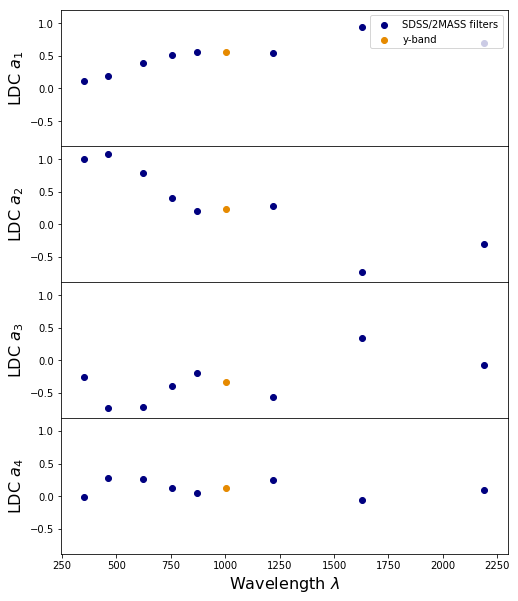

In [119]:
# get_y_LDC(6000,2.3,0)
y_plot(6000,2.3,0)

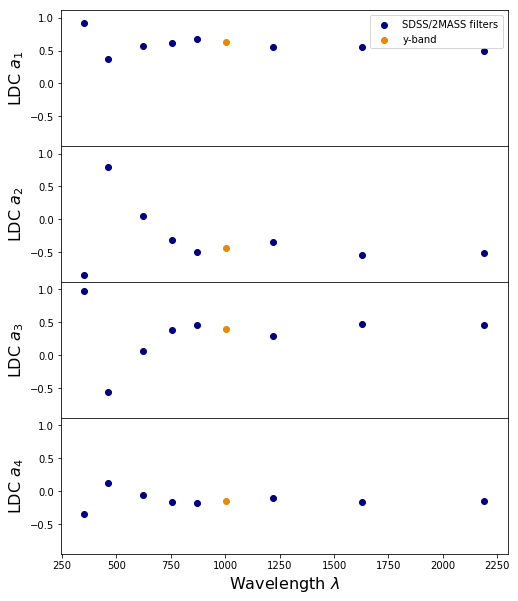

In [107]:
y_plot(9000,4.2,-0.3)

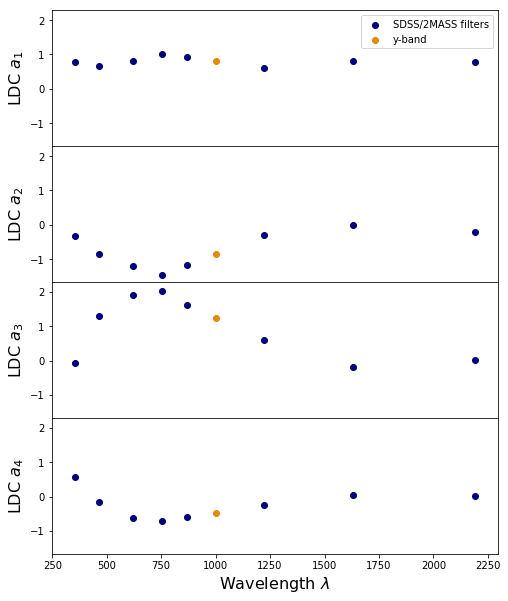

In [108]:
y_plot(4000,3.5,0.2)

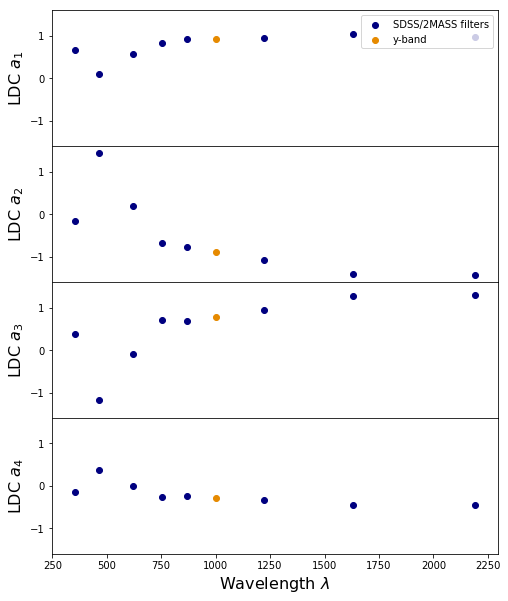

In [105]:
y_plot(8750,2.1, 0.6)

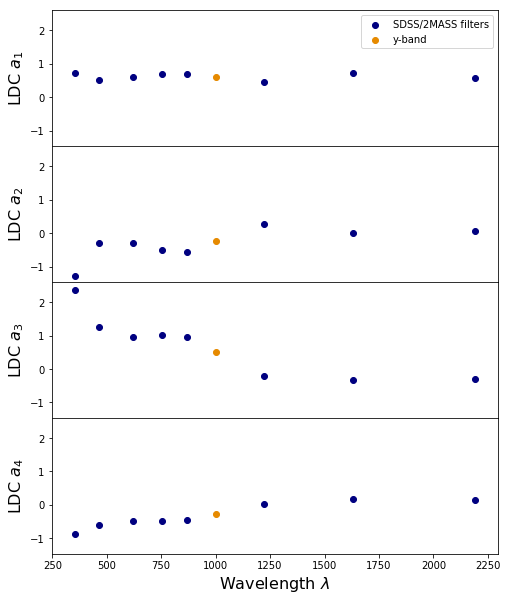

In [115]:
y_plot(5500, 4.9, -0.1 )

In [ ]:
# Make plot with different stellar models overlayed (Diff models in diff colors)